# Categories analysis

In [1]:
import pandas as pd

Read all data

In [2]:
df_hatemedia = pd.read_excel("...")

df_hatemedia = df_hatemedia.drop([0,82])

df_hatemedia.drop(columns=['Count'], inplace=True)

# Mostrar las primeras filas del DataFrame para verificar la lectura correcta
display(df_hatemedia)

,Topic,Count_v2,Name,KeyBERT + MMR,Representation,Llama2,Llama2(v2),Zephyr,Llama2(vK),Zephyr(v2),...,Aux,KeyBERT,MMR,Representative_Docs,Sample_Docs,Negative,Neutral,Positive,Hate,No Hate
1,0,13019,0_vacunas_vacuna_dosis_vacunación,"['vacunaciones', 'vacunado', 'vacunar', 'vacun...","['vacunas', 'vacuna', 'dosis', 'vacunación', '...",Vaccines and their distribution in Spain,Covid-19 vaccination in Spain,COVID Vaccine Distribution and Administration,Vaccination,"""COVID-19 Vaccination Rollout in Spain""",...,0,"['vacunaciones', 'vacunados', 'vacunar', 'vacu...","['vacunas', 'vacuna', 'dosis', 'vacunación', '...",[' vaya el precio de la vacuna de az es tan b...,primero lo del forensejefe aleman a parte que...,8170.0,3704.0,1145.0,491.0,12528.0
2,1,26681,1_si_vaya_pues_españa,"['pasar', 'ir', 'valer', 'pala', 'hacer', 'si'...","['si', 'vaya', 'pues', 'españa', 'va', 'pi', '...",Spanish culture and language,"""Spain's economy and politics""",Spain 's Quirky Expressions,PVL,Political Discourse and Criticism,...,0,"['pasa', 'vas', 'vale', 'pala', 'hace', 'si', ...","['si', 'vaya', 'pues', 'españa', 'va', 'pi', '...","['españa', 'vaya país vaya tela', 'pues como l...","que estáis celosos , pues se aburrir tela te l...",16485.0,7872.0,2324.0,1284.0,25397.0
3,2,15880,2_mujer_mujeres_madre_hijos,"['feminista', 'mujer', 'feminismo', 'puta', 'm...","['mujer', 'mujeres', 'madre', 'hijos', 'niños'...",Gender-based violence and discrimination again...,Topic about labeling assistants,Gender and Family Relationships,Feminist Women,"Contested Child Custody and Parental Conflict""",...,0,"['feminista', 'mujer', 'feminismo', 'mujeres',...","['mujer', 'mujeres', 'madre', 'hijos', 'niños'...","['la madre que lo', 'va a ser bastante diverti...",yo vì y oí la discusion que mantuvo con joao y...,9897.0,4562.0,1421.0,705.0,15175.0
4,3,11424,3_madrid_barcelona_club_madrileños,"['madrid', 'madrileño', 'barcelona', 'cataluña...","['madrid', 'barcelona', 'club', 'madrileños', ...",Madrid vs Barcelona football rivalry,Madrid's population over millions and damages ...,Madrid Politics and Football,Madrid Football Club,"""Madrid's Social and Political Landscape: From...",...,0,"['madrid', 'madrileña', 'madrileño', 'madrileñ...","['madrid', 'barcelona', 'club', 'madrileños', ...","['esto lo están haciendo en todo madrid', ' el...",pues si en madrid viven más de millones de pe...,7150.0,3275.0,999.0,455.0,10969.0
5,4,8641,4_españoles_español_española_españa,"['español', 'españolito', 'espanyol', 'spain',...","['españoles', 'español', 'española', 'españa',...",Spanish politics and society,Spanish politics and society during COVID-19 p...,Spanish Citizens and Government,Spanish-related,"""Spanish political and economic issues""",...,1,"['españoles', 'españolitos', 'españolas', 'esp...","['españoles', 'español', 'española', 'españa',...","['los demás también somos españoles', 'estos e...",la pregunta es a qué llama usted negacionista...,5531.0,2409.0,701.0,303.0,8338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,76,782,76_ciclistas_ciclista_bici_bicicleta,"['ciclismo', 'bicicleta', 'bici', 'bicis', 'ci...","['ciclistas', 'ciclista', 'bici', 'bicicleta',...",Cycling safety concerns in Madrid,Cycling rules violations and consequences,Cyclist Safety Concerns,Cycling,"""Cyclist vs. Pedestrian Safety Concerns""",...,0,"['ciclismo', 'bicicletas', 'bici', 'bicicleta'...","['ciclistas', 'ciclista', 'bici', 'bicicleta',...",['la culpa es del ciclista por ir en bici no s...,pues entiéndala cuando yendo de ciclista deje...,492.0,215.0,75.0,35.0,747.0
78,77,1322,77_independencia_independentismo_independentis...,"['independencia', 'independentista', 'independ...","['independencia', 'independentismo', 'independ...",Why there will never be independence,Catalonia Independence,Catalan Independence Debate,Catalan Independence,"""Catalonia's Independence Movement: Challenges...",...,0,"['independencia', 'independentista', 'independ...","

Group human-tag by category

In [4]:
import pandas as pd

# Agrupar por la columna "Type(v2)" y seleccionar los registros de la columna "Final"
grouped_data = df_hatemedia.groupby('Type(v2)')['Final'].apply(list).reset_index()

# Mostrar los registros de la columna "Final" de cada grupo
for idx, row in grouped_data.iterrows():
    print(f"Type(v2): {row['Type(v2)']}")
    print(f"Final: {row['Final']}\n")


Type(v2): COVID-19
Final: ['Vaccination', 'COVID-19 contagion', 'Pandemic management', 'COVID incidence']

Type(v2): Expressions and slang
Final: ['Conversation expressions', 'Negative expressions', 'Time expressions', 'Insults and slurs', 'Sarcastic expressions', 'Internet slang']

Type(v2): Hobbies and lifestyle
Final: ['Music', 'Food', 'Reading and writing', 'Beverages', 'Photography', 'Astronomy', 'Cinematography']

Type(v2): International relations and immigration
Final: ['Latin America', 'China', 'European Union ', 'Homeland', 'Russia', 'Immigration', 'Global issues', 'Moroccan immigration', 'Currency', 'France']

Type(v2): Political issues
Final: ['US politics', 'Socialism and communism', 'Government', 'Political system', 'Fascism', 'Government ministries', 'Royalty and monarchy', 'Amnesty', 'Democracy', 'Terrorism', 'Dictatorships', 'Left and right wing', 'Populism', 'Independentism']

Type(v2): Public administration
Final: ['Justice system', 'Healthcare system', 'Electoral sys

Topics with less hate

In [5]:
df_hatemedia_sorted = df_hatemedia.sort_values(by='Hate', ascending=True)
df_hatemedia_sorted[['Topic', 'Final','Hate']].head(20)

,Topic,Final,Hate
68,67,Moroccan immigration,28.0
69,68,Transport system,31.0
75,74,Populism,33.0
51,50,Amnesty,34.0
77,76,Cycling and motorcycling,35.0
42,41,Russia,40.0
78,77,Independentism,40.0
57,56,Airlines,40.0
76,75,Smoking,44.0
71,70,Sarcastic expressions,45.0


Topics with most hate

In [5]:
df_hatemedia_sorted = df_hatemedia.sort_values(by='Hate', ascending=False)
df_hatemedia_sorted[['Topic', 'Final','Hate']].head(20)

,Topic,Final,Hate
2,1,Conversation expressions,1284.0
9,8,Negative expressions,1107.0
3,2,Gender and feminism,705.0
12,11,Time expressions,509.0
6,5,Media,499.0
1,0,Vaccination,491.0
4,3,Madrid,455.0
7,6,Justice system,364.0
17,16,Death and violence,314.0
19,18,Money matters,306.0


Sort by number of public reactions

In [5]:
df_hatemedia_sorted = df_hatemedia.sort_values(by='Count_v2', ascending=False)
df_hatemedia_sorted.head(10)

,Topic,Count_v2,Name,KeyBERT + MMR,Representation,Llama2,Llama2(v2),Zephyr,Llama2(vK),Zephyr(v2),...,Aux,KeyBERT,MMR,Representative_Docs,Sample_Docs,Negative,Neutral,Positive,Hate,No Hate
2,1,26681,1_si_vaya_pues_españa,"['pasar', 'ir', 'valer', 'pala', 'hacer', 'si'...","['si', 'vaya', 'pues', 'españa', 'va', 'pi', '...",Spanish culture and language,"""Spain's economy and politics""",Spain 's Quirky Expressions,PVL,Political Discourse and Criticism,...,0,"['pasa', 'vas', 'vale', 'pala', 'hace', 'si', ...","['si', 'vaya', 'pues', 'españa', 'va', 'pi', '...","['españa', 'vaya país vaya tela', 'pues como l...","que estáis celosos , pues se aburrir tela te l...",16485.0,7872.0,2324.0,1284.0,25397.0
9,8,25698,8_nadie_pues_nunca_si,"['nadie', 'ninguno', 'nunca', 'tampoco', 'solo...","['nadie', 'pues', 'nunca', 'si', 'tampoco', 'v...",No one gives up here\nNo one gets called like ...,"""Italian Crisis""",No one 's actions or feelings matter,NaN,Miscellaneous Topics and Opinions,...,0,"['nadie', 'ninguno', 'ningún', 'ninguna', 'nun...","['nadie', 'pues', 'nunca', 'si', 'tampoco', 'v...","['nadie lo va a llamar así', 'en realidad nadi...",no mienta en estos temas gracias deje la mezqu...,16034.0,7389.0,2275.0,1107.0,24591.0
3,2,15880,2_mujer_mujeres_madre_hijos,"['feminista', 'mujer', 'feminismo', 'puta', 'm...","['mujer', 'mujeres', 'madre', 'hijos', 'niños'...",Gender-based violence and discrimination again...,Topic about labeling assistants,Gender and Family Relationships,Feminist Women,"Contested Child Custody and Parental Conflict""",...,0,"['feminista', 'mujer', 'feminismo', 'mujeres',...","['mujer', 'mujeres', 'madre', 'hijos', 'niños'...","['la madre que lo', 'va a ser bastante diverti...",yo vì y oí la discusion que mantuvo con joao y...,9897.0,4562.0,1421.0,705.0,15175.0
1,0,13019,0_vacunas_vacuna_dosis_vacunación,"['vacunaciones', 'vacunado', 'vacunar', 'vacun...","['vacunas', 'vacuna', 'dosis', 'vacunación', '...",Vaccines and their distribution in Spain,Covid-19 vaccination in Spain,COVID Vaccine Distribution and Administration,Vaccination,"""COVID-19 Vaccination Rollout in Spain""",...,0,"['vacunaciones', 'vacunados', 'vacunar', 'vacu...","['vacunas', 'vacuna', 'dosis', 'vacunación', '...",[' vaya el precio de la vacuna de az es tan b...,primero lo del forensejefe aleman a parte que...,8170.0,3704.0,1145.0,491.0,12528.0
4,3,11424,3_madrid_barcelona_club_madrileños,"['madrid', 'madrileño', 'barcelona', 'cataluña...","['madrid', 'barcelona', 'club', 'madrileños', ...",Madrid vs Barcelona football rivalry,Madrid's population over millions and damages ...,Madrid Politics and Football,Madrid Football Club,"""Madrid's Social and Political Landscape: From...",...,0,"['madrid', 'madrileña', 'madrileño', 'madrileñ...","['madrid', 'barcelona', 'club', 'madrileños', ...","['esto lo están haciendo en todo madrid', ' el...",pues si en madrid viven más de millones de pe...,7150.0,3275.0,999.0,455.0,10969.0
12,11,11222,11_año_tarde_mañana_días,"['tarde', 'retrasado', 'retraso', 'aún', 'tard...","['año', 'tarde', 'mañana', 'días', 'tiempo', '...",Late nights and sleep deprivation,"""Labeling Assistant""",Late Year Reflections,"Late, delayed, delay, yet, still, time, coming...",Horoscope predictions for January 1st based on...,...,0,"['tarde', 'retrasados', 'retraso', 'aún', 'tar...","['año', 'tarde', 'mañana', 'días', 'tiempo', '...","['un poco tarde', 'pues qué bien va el año', '...",en la tiempos que corren muy necesario el arti...,6941.0,3282.0,999.0,509.0,10713.0
7,6,9390,6_cárcel_justicia_jueces_juez,"['condenado', 'preso', 'cárcel', 'delincuente'...","['cárcel', 'justicia', 'jueces', 'juez', 'deli...",Judicial system corruption,"""Assistant for labeling topics""",Justice and Prison Inconsistencies,Convicted criminals,Spanish Justice System's Crackdown on Politica...,...,1,"['condenados', 'presos', 'cárcel', 'delincuent...","['cárcel', 'justicia', 'jueces', 'juez', 'deli...",['lo que es delito es que esta persona sea jue...,matar y

In [6]:
df_hatemedia_sorted = df_hatemedia.sort_values(by='Negative', ascending=False)
df_hatemedia_sorted[['Topic', 'Final','Negative']].head(20)

,Topic,Final,Negative
2,1,Conversation expressions,16485.0
9,8,Negative expressions,16034.0
3,2,Gender and feminism,9897.0
1,0,Vaccination,8170.0
4,3,Madrid,7150.0
12,11,Time expressions,6941.0
7,6,Justice system,5951.0
6,5,Media,5815.0
16,15,Municipal funding,5547.0
5,4,Spanish politics,5531.0


In [7]:
df_hatemedia_sorted = df_hatemedia.sort_values(by='Negative', ascending=True)
df_hatemedia_sorted[['Topic', 'Final','Negative']].head(20)

,Topic,Final,Negative
75,74,Populism,467.0
68,67,Moroccan immigration,479.0
77,76,Cycling and motorcycling,492.0
76,75,Smoking,510.0
71,70,Sarcastic expressions,540.0
69,68,Transport system,602.0
57,56,Airlines,636.0
58,57,Insults and slurs,733.0
65,64,Islam,734.0
70,69,Dictatorships,743.0


In [6]:
# Agrupar por la columna "Type" y sumar la columna "Count"
grouped_data = df_hatemedia.groupby('Type(v2)')['Count_v2'].sum().reset_index()

# Ordenar los valores por la columna "Count" en orden descendente
grouped_data = grouped_data.sort_values(by='Count_v2', ascending=False)

# Mostrar el DataFrame ordenado
#print("Grouped and sorted data:")
#print(grouped_data)

# Calcular la suma total de todos los valores en la columna "Count"
total_count = grouped_data['Count_v2'].sum()

# Calcular el porcentaje para cada valor de "Count"
grouped_data['Percentage'] = (grouped_data['Count_v2'] * 100 / 337807).round(2)

print("Grouped data with total count and percentages:")
print(grouped_data)

# Mostrar la suma total ordenada
print(f"Total count: {total_count}")
total_per = grouped_data['Percentage'].sum()
print(f"Total %: {total_per}")

Grouped data with total count and percentages:
                                     Type(v2)  Count_v2  Percentage
6                               Social issues     75048       22.22
1                       Expressions and slang     68741       20.35
4                            Political issues     39851       11.80
5                       Public administration     39505       11.69
7                            Spanish politics     37375       11.06
0                                    COVID-19     25320        7.50
3     International relations and immigration     24488        7.25
2                       Hobbies and lifestyle     15492        4.59
8  Transportation, safety and primary sectors     11987        3.55
Total count: 337807
Total %: 100.01


In [7]:
# Agrupar por la columna "Type" y sumar la columna "Count"
grouped_data = df_hatemedia.groupby('Type(v2)')['Negative'].sum().reset_index()

# Ordenar los valores por la columna "Count" en orden descendente
grouped_data = grouped_data.sort_values(by='Negative', ascending=False)

# Mostrar el DataFrame ordenado
#print("Grouped and sorted data:")
#print(grouped_data)

# Calcular la suma total de todos los valores en la columna "Count"
total_count = grouped_data['Negative'].sum()

# Calcular el porcentaje para cada valor de "Count"
grouped_data['Percentage'] = (grouped_data['Negative'] * 100 / 337807).round(2)

print("Grouped data with total count and percentages:")
print(grouped_data)

# Mostrar la suma total ordenada
print(f"Total Negative: {total_count}")
total_per = grouped_data['Percentage'].sum()
print(f"Total %: {total_per}")

Grouped data with total count and percentages:
                                     Type(v2)  Negative  Percentage
6                               Social issues   46650.0       13.81
1                       Expressions and slang   42611.0       12.61
4                            Political issues   24985.0        7.40
5                       Public administration   24953.0        7.39
7                            Spanish politics   23679.0        7.01
0                                    COVID-19   15976.0        4.73
3     International relations and immigration   15449.0        4.57
2                       Hobbies and lifestyle    9633.0        2.85
8  Transportation, safety and primary sectors    7631.0        2.26
Total Negative: 211567.0
Total %: 62.63


In [8]:
# Agrupar por la columna "Type" y sumar la columna "Count"
grouped_data = df_hatemedia.groupby('Type(v2)')['Neutral'].sum().reset_index()

# Ordenar los valores por la columna "Count" en orden descendente
grouped_data = grouped_data.sort_values(by='Neutral', ascending=False)

# Mostrar el DataFrame ordenado
#print("Grouped and sorted data:")
#print(grouped_data)

# Calcular la suma total de todos los valores en la columna "Count"
total_count = grouped_data['Neutral'].sum()

# Calcular el porcentaje para cada valor de "Count"
grouped_data['Percentage'] = ((grouped_data['Neutral'] * 100) / 337807).round(3)

print("Grouped data with total count and percentages:")
print(grouped_data)

# Mostrar la suma total ordenada
print(f"Total Neutral: {total_count}")
total_per = grouped_data['Percentage'].sum().round(2)
print(f"Total %: {total_per}")

Grouped data with total count and percentages:
                                     Type(v2)  Neutral  Percentage
6                               Social issues  21750.0       6.439
1                       Expressions and slang  20060.0       5.938
4                            Political issues  11390.0       3.372
5                       Public administration  11083.0       3.281
7                            Spanish politics  10520.0       3.114
0                                    COVID-19   7140.0       2.114
3     International relations and immigration   6970.0       2.063
2                       Hobbies and lifestyle   4491.0       1.329
8  Transportation, safety and primary sectors   3313.0       0.981
Total Neutral: 96717.0
Total %: 28.63


In [9]:
# Agrupar por la columna "Type" y sumar la columna "Count"
grouped_data = df_hatemedia.groupby('Type(v2)')['Positive'].sum().reset_index()

# Ordenar los valores por la columna "Count" en orden descendente
grouped_data = grouped_data.sort_values(by='Positive', ascending=False)

# Mostrar el DataFrame ordenado
#print("Grouped and sorted data:")
#print(grouped_data)

# Calcular la suma total de todos los valores en la columna "Count"
total_count = grouped_data['Positive'].sum()

# Calcular el porcentaje para cada valor de "Count"
grouped_data['Percentage'] = grouped_data['Positive'] * 100 / 337807

print("Grouped data with total count and percentages:")
print(grouped_data)

# Mostrar la suma total ordenada
print(f"Total Positive: {total_count}")
total_per = grouped_data['Percentage'].sum()
print(f"Total %: {total_per}")

Grouped data with total count and percentages:
                                     Type(v2)  Positive  Percentage
6                               Social issues    6648.0    1.967988
1                       Expressions and slang    6070.0    1.796884
4                            Political issues    3476.0    1.028990
5                       Public administration    3469.0    1.026918
7                            Spanish politics    3176.0    0.940182
0                                    COVID-19    2204.0    0.652444
3     International relations and immigration    2069.0    0.612480
2                       Hobbies and lifestyle    1368.0    0.404965
8  Transportation, safety and primary sectors    1043.0    0.308756
Total Positive: 29523.0
Total %: 8.739605751212972


In [10]:
# Agrupar por la columna "Type" y sumar la columna "Count"
grouped_data = df_hatemedia.groupby('Type(v2)')['Hate'].sum().reset_index()

# Ordenar los valores por la columna "Count" en orden descendente
grouped_data = grouped_data.sort_values(by='Hate', ascending=False)

# Mostrar el DataFrame ordenado
#print("Grouped and sorted data:")
#print(grouped_data)

# Calcular la suma total de todos los valores en la columna "Count"
total_count = grouped_data['Hate'].sum()

# Calcular el porcentaje para cada valor de "Count"
grouped_data['Percentage'] = grouped_data['Hate'] * 100 / 337807

print("Grouped data with total count and percentages:")
print(grouped_data)

# Mostrar la suma total ordenada
print(f"Total Hate: {total_count}")
total_per = grouped_data['Percentage'].sum()
print(f"Total %: {total_per}")

Grouped data with total count and percentages:
                                     Type(v2)    Hate  Percentage
6                               Social issues  3280.0    0.970969
1                       Expressions and slang  3171.0    0.938702
4                            Political issues  1523.0    0.450849
5                       Public administration  1379.0    0.408221
7                            Spanish politics  1289.0    0.381579
0                                    COVID-19   938.0    0.277673
3     International relations and immigration   904.0    0.267608
2                       Hobbies and lifestyle   679.0    0.201002
8  Transportation, safety and primary sectors   449.0    0.132916
Total Hate: 13612.0
Total %: 4.0295198145686735


In [11]:
# Agrupar por la columna "Type" y sumar la columna "Count"
grouped_data = df_hatemedia.groupby('Type(v2)')['No Hate'].sum().reset_index()

# Ordenar los valores por la columna "Count" en orden descendente
grouped_data = grouped_data.sort_values(by='No Hate', ascending=False)

# Mostrar el DataFrame ordenado
#print("Grouped and sorted data:")
#print(grouped_data)

# Calcular la suma total de todos los valores en la columna "Count"
total_count = grouped_data['No Hate'].sum()

# Calcular el porcentaje para cada valor de "Count"
grouped_data['Percentage'] = grouped_data['No Hate'] * 100 / 337807

print("Grouped data with total count and percentages:")
print(grouped_data)

# Mostrar la suma total ordenada
print(f"Total NO Hate: {total_count}")
total_per = grouped_data['Percentage'].sum()
print(f"Total %: {total_per}")

Grouped data with total count and percentages:
                                     Type(v2)  No Hate  Percentage
6                               Social issues  71768.0   21.245267
1                       Expressions and slang  65570.0   19.410492
4                            Political issues  38328.0   11.346124
5                       Public administration  38126.0   11.286326
7                            Spanish politics  36086.0   10.682431
0                                    COVID-19  24382.0    7.217731
3     International relations and immigration  23584.0    6.981501
2                       Hobbies and lifestyle  14813.0    4.385048
8  Transportation, safety and primary sectors  11538.0    3.415560
Total NO Hate: 324195.0
Total %: 95.97048018543133


Visualize data

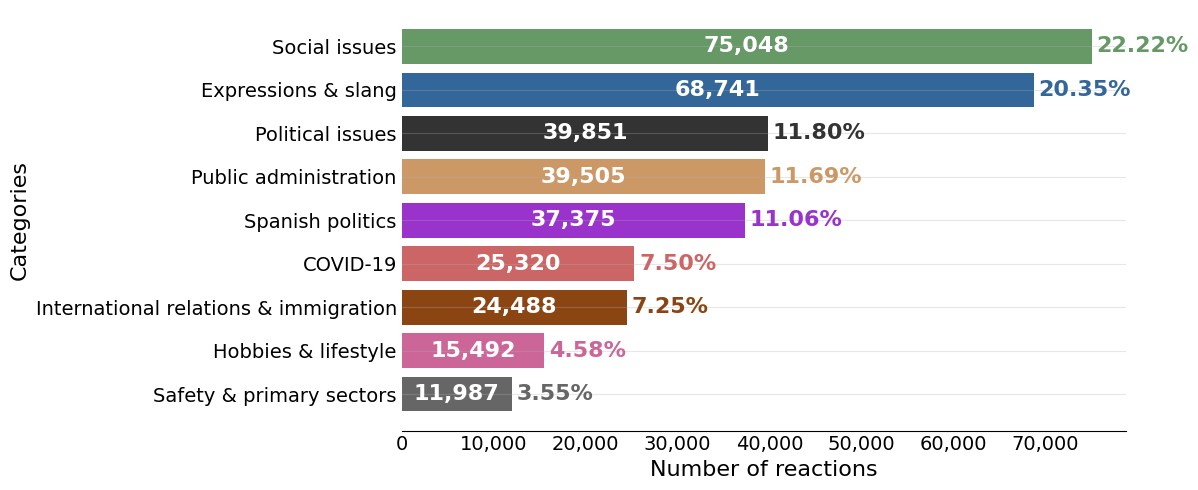

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import seaborn as sns

# Datos para las categorías
categories = ["Social issues", "Expressions & slang", "Political issues", "Public administration", "Spanish politics", "COVID-19", "International relations & immigration", "Hobbies & lifestyle", "Safety & primary sectors"]
reactions = [75048, 68741, 39851, 39505, 37375, 25320, 24488, 15492, 11987]
percentages = [22.22, 20.35, 11.80, 11.69, 11.06, 7.50, 7.25, 4.58, 3.55]

# Ordenar las categorías, reacciones y porcentajes en función de las reacciones (de mayor a menor)
sorted_data = sorted(zip(reactions, categories, percentages), reverse=False)
reactions, categories, percentages = zip(*sorted_data)

# Creación del gráfico de barras
fig, ax = plt.subplots(figsize=(12, 5))

# Configurar la paleta de colores
palette = sns.color_palette("Set1")

colors = {
    "Social issues": "#669966",  # Verde más oscuro
    "Expressions & slang": "#336699",  # Azul más oscuro
    "Political issues": "#333333",  # Gris más oscuro
    "Public administration": "#cc9966",  # Beige más oscuro
    "Spanish politics": "#9933cc",  # Rosa más oscuro
    "COVID-19": "#cc6666",  # Rojo más oscuro
    "International relations & immigration": "#8B4513",  # Lila más oscuro
    "Hobbies & lifestyle": "#cc6699",  # Durazno más oscuro
    "Safety & primary sectors": "#666666"  # Amarillo más oscuro
}

# Crear lista de colores ordenada
sorted_colors = [colors[category] for category in categories]

    
palette[5] = (0, 0, 0)  # Reemplazar amarillo con gris
palette[4] = (255/255, 140/255, 0/255)
# Añadir los porcentajes a las barras
for i in range(len(categories)):
    bar = plt.barh(categories[i], reactions[i], color=sorted_colors[i], edgecolor='none', align='center', height=0.8)
    bb = bar[0].get_bbox()
    color = bar[0].get_facecolor()
    ax.text(reactions[i] + 500, i, f'{percentages[i]:.2f}%', va='center', fontsize=16, color=color, weight='bold')
    # Añadir valor absoluto
    ax.text(reactions[i] / 2, i, f'{reactions[i]:,}', va='center', ha='center', fontsize=16, color='white', weight='bold')

ax.set_xlabel('Number of reactions', fontsize=16)
ax.set_ylabel('Categories', fontsize=16)
ax.set_title('')

# Aumentar el tamaño de letra de los ticks del eje x e y
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Formato de los ticks del eje x
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.tick_params(axis='both', which='both', length=0)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()

# Guardar en PDF y SVG
plt.savefig("reactions_per_category.pdf")
plt.savefig("reactions_per_category.svg")

plt.show()
